Задание 5. Линейное программирование. Графический метод<br>Вариант 15

In [1]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
frac = lambda x: float(x.split('/')[0]) / float(x.split('/')[1]) if '/' in x else float(x)
print('Введите числа a, b, c. Число вводить можно как целое, так и в виде дроби (десятичной или обыкновенной)')
a = frac(input('a = '))
b = frac(input('b = '))
c = frac(input('c = '))

Введите числа a, b, c. Число вводить можно как целое, так и в виде дроби (десятичной или обыкновенной)
a = 7/4
b = 6
c = 3


In [3]:
def f(xy):
    x, y = xy
    return -(x + a * y)

In [4]:
def gr(xy):
    x, y = xy
    
    der = np.zeros_like(xy)
    der[0] = -1
    der[1] = -a
    
    return der

In [5]:
#Вводим границы, если они есть, если нет, задокументируем

# x_min = 0
# y_min = 0
# x_max = np.inf
# y_max = np.inf
# bounds = Bounds([x_min, y_min], [x_max, y_max])

#Вводим ограничения             [кф.при x,кф.при y] >=  <=
linear_constraints = [LinearConstraint([1, 2], -np.inf, 10),
                      LinearConstraint([3, 2], -np.inf, 18),
                      LinearConstraint([1, -1], -b, np.inf),
                      LinearConstraint([c, -1], -np.inf, 8*c + 3)]
x0 = np.array([1.0, 1.0])

#В данной задаче необходимо максимизировать функцию, сл-но необходимо минимизировать обратную ей (-f). 
#Для вариантов 21-40 функцию нужно минимизировать, т.е. нужно будет убрать минусы из ф-ий f и gr
res = minimize(f, x0, jac=gr, constraints=linear_constraints, options={'disp': True})

u = res.x[0]
v = res.x[1]
F_max = -res.fun
print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -9.249999999998911
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6
[4. 3.]


In [6]:
print(f'Оптимальные значения: x = {u.round(3)}, y = {v.round(3)}')
print('Max значение функции:',F_max.round(3))

Оптимальные значения: x = 4.0, y = 3.0
Max значение функции: 9.25


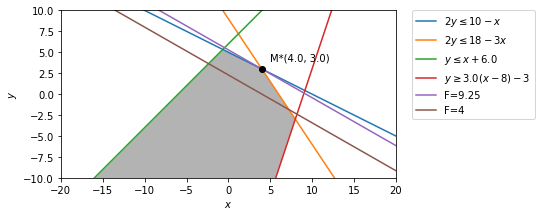

In [7]:
d = np.linspace(-20,20,300)
x,y = np.meshgrid(d,d)

plt.imshow( ((2*y<=10-x) & (2*y<=18-3*x) & (y<=x+b) & (y>=c*x-8*c-3)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

x = np.linspace(-20, 20, 2000)

# 2y <= 10 - x
y1 = (10-x)/2.0
# 2y <= 18 - 3x 
y2 = (18-3*x)/2.0
# y <= x + b
y3 = x + b
# y >= cx - 8c - 3 
y4 = c*x - 8*c - 3

#Линии уровня y = F(x, y)/a - x/a
y5 = F_max/a - x/a
y6 = 4/a - x/a


# Рисуем линии
plt.plot(x, y1, label=r'$2y\leq 10-x$')
plt.plot(x, y2, label=r'$2y\leq 18-3x$')
plt.plot(x, y3, label=fr'$y\leq x + {b}$')
plt.plot(x, y4, label=fr'$y\geq {c}(x-8)-3$')

plt.plot(x, y5, label=f'F={F_max.round(3)}')
plt.plot(x, y6, label='F=4')

plt.xlim(-20,20)
plt.ylim(-10,10)

plt.plot(u, v, 'ko')
plt.text(u + 1, v + 1, f'M*({u.round(3)}, {v.round(3)})')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()